**2. Dựa vào file ‘Logistic regression-petal-batch-sigmoid.ipynb’, cài đặt lại theo 1-sample và m-sample.**

- m-sample

Theta:  [-7.52134358  2.11729736  2.95184254]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

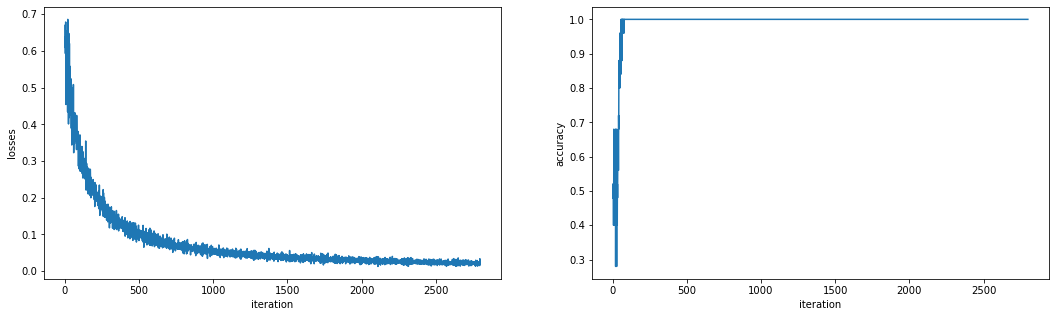

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size


lr=0.1
num_iter = 700
m = 25
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # for each mini-batch
    for j in range(0, X_size, m):
        
        if j+m >= X_size:
            k = X_size
        else:
            k = j+m
        # pick m samples
        x_ = X[j:k, :]
        y_ = y[j:k]

        # predict z
        y_hat = predict(x_, theta)

        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss
        losses.append(loss)
        
        theta -= lr*gradient
        #print('new theta: ', theta)

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs.append(acc)        
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

- 1-sample

Theta:  [-10.24972824   2.87209485   4.09882845]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

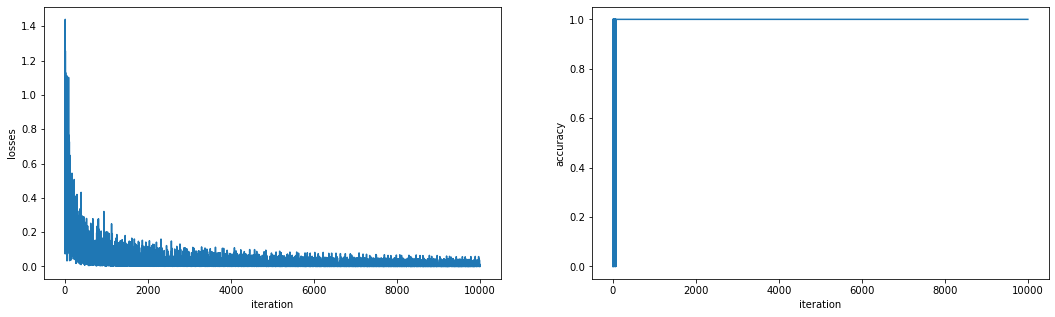

In [2]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size


lr=0.1
num_iter = 100
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # for each sample
    for j in range(X_size):
        
        # pick 1 sample
        x_ = X[j:j+1]
        y_ = y[j:j+1]

        # predict z
        y_hat = predict(x_, theta)

        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss
        losses.append(loss)
        
        theta -= lr*gradient
        #print('new theta: ', theta)

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs.append(acc)        
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

**3. Dựa vào file ‘Logistic regression-petal-batch-sigmoid.ipynb’, cài đặt lại bài toán phân loại nhị phân dùng hàm tanh**

- 1-sample

Theta:  [-6.18203334  1.82014654  2.4387745 ]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

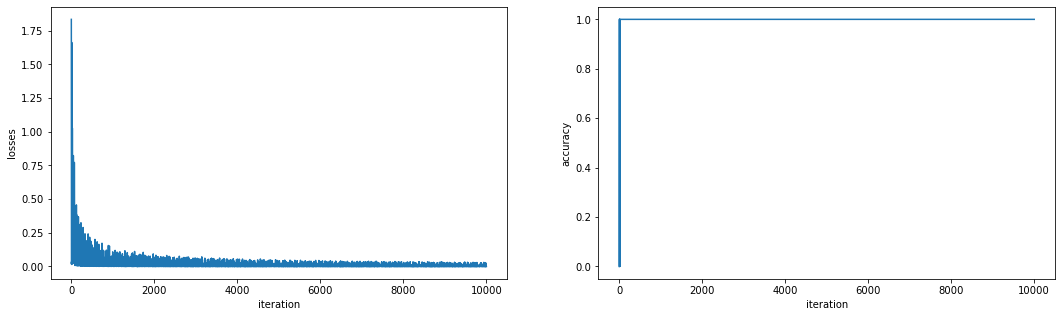

In [3]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def tanh_function(z):
    return 1 - 2/(np.exp(2*z)+1)

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = (tanh_function(np.dot(X, theta))+1)/2
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)*(1 + y_hat)) / y.size

lr=0.1
num_iter = 100
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # for each sample
    for j in range(X_size):
        
        # pick 1 sample
        x_ = X[j:j+1]
        y_ = y[j:j+1]

        # predict z
        y_hat = predict(x_, theta)

        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss
        losses.append(loss)
        
        theta -= lr*gradient
        #print('new theta: ', theta)

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs.append(acc)         
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

- m-sample

Theta:  [-4.75986537  1.41792921  1.8272254 ]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

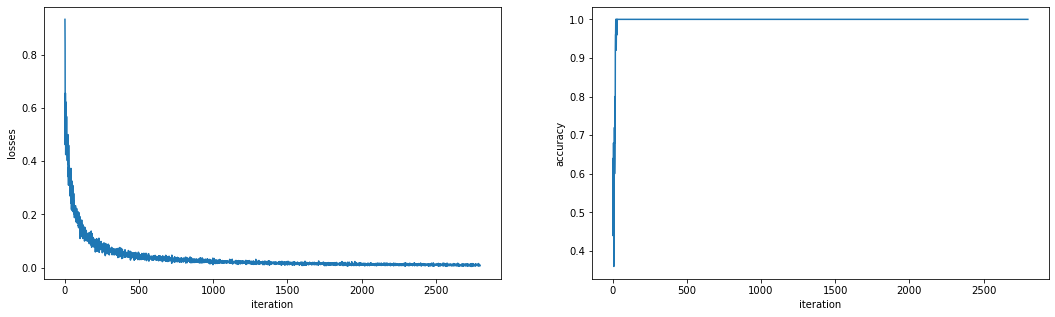

In [4]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def tanh_function(z):
    return 1 - 2/(np.exp(2*z)+1)

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = (tanh_function(np.dot(X, theta))+1)/2
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)*(1 + y_hat)) / y.size

lr=0.1
num_iter = 700
m = 25
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # for each mini-batch
    for j in range(0, X_size, m):
        
        if j+m >= X_size:
            k = X_size
        else:
            k = j+m
        # pick m samples
        x_ = X[j:k, :]
        y_ = y[j:k]

        # predict z
        y_hat = predict(x_, theta)

        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss
        losses.append(loss)
        
        theta -= lr*gradient
        #print('new theta: ', theta)

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs.append(acc)        
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

- N-sample

Theta:  [-3.34512901  1.0291237   1.22356864]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

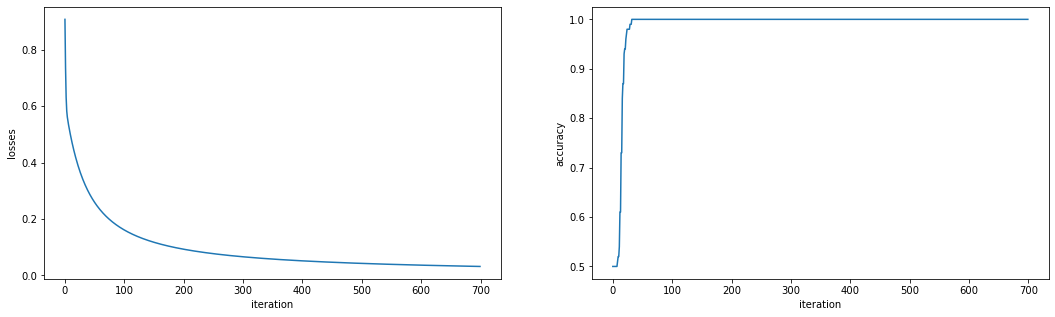

In [5]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def tanh_function(z):
    return 1 - 2/(np.exp(2*z)+1)

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = (tanh_function(np.dot(X, theta))+1)/2
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)*(1 + y_hat)) / y.size

lr=0.1
num_iter = 700
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    theta -= lr*gradient    
    #print('new theta: ', theta)

    # for debug
    if(i%1 == 0):
        # loss
        losses.append(loss)
        
        # accuracy for training
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)     
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

**4. Dựa vào file ‘Logistic regression-petal-batch-sigmoid.ipynb’, cài đặt lại bài toán phân loại nhị phân dùng hàm MSE (L2 loss)**

- 1-sample

Theta:  [-6.33626734  1.80159552  2.45657168]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

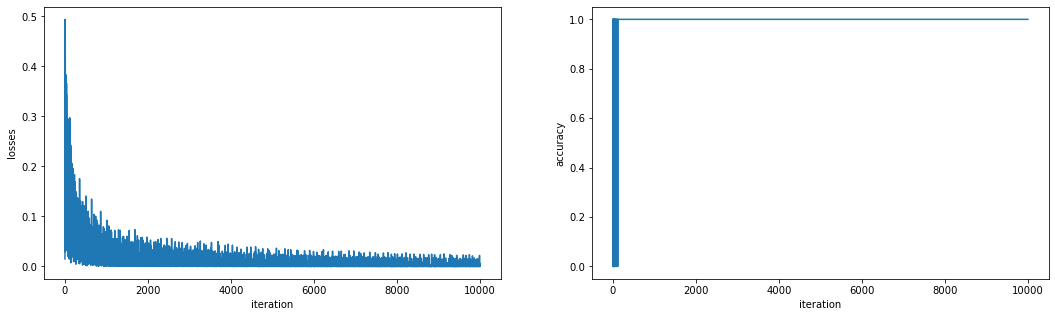

In [6]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return ((h-y)*(h-y)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return 2*np.dot(X.T, (y_hat - y)*y_hat*(1 - y_hat)) / y.size


lr=0.1
num_iter = 100
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # for each sample
    for j in range(X_size):
        
        # pick 1 sample
        x_ = X[j:j+1]
        y_ = y[j:j+1]

        # predict z
        y_hat = predict(x_, theta)

        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss
        losses.append(loss)
        
        theta -= lr*gradient
        #print('new theta: ', theta)

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs.append(acc)        
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

- m-sample

Theta:  [-4.70894556  1.34136384  1.77175773]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

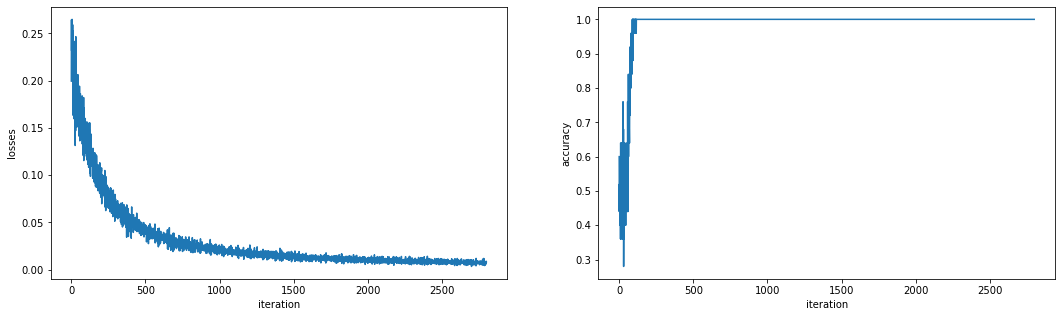

In [7]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return ((h-y)*(h-y)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return 2*np.dot(X.T, (y_hat - y)*y_hat*(1 - y_hat)) / y.size


lr=0.1
num_iter = 700
m = 25
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # for each mini-batch
    for j in range(0, X_size, m):
        
        if j+m >= X_size:
            k = X_size
        else:
            k = j+m
        # pick m samples
        x_ = X[j:k, :]
        y_ = y[j:k]

        # predict z
        y_hat = predict(x_, theta)

        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss
        losses.append(loss)
        
        theta -= lr*gradient
        #print('new theta: ', theta)

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs.append(acc)        
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

- N-sample

Theta:  [-2.92559267  0.87534177  1.02635668]


[Text(0.5, 0, 'iteration'), Text(0, 0.5, 'accuracy')]

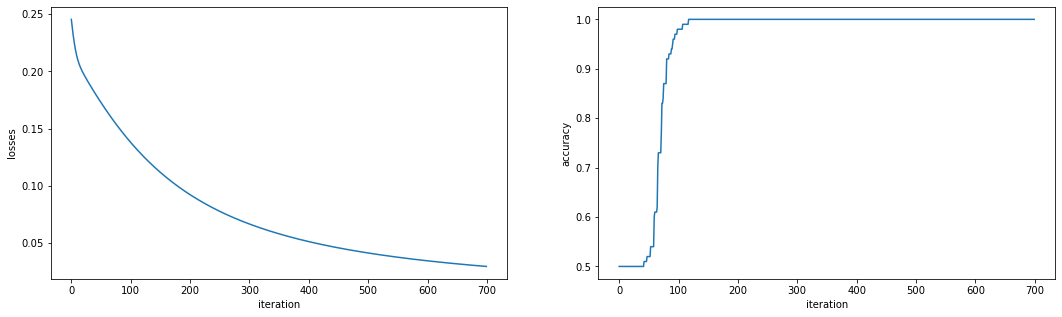

In [8]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

X_size = X.shape[0]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return ((h-y)*(h-y)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return 2*np.dot(X.T, (y_hat - y)*y_hat*(1 - y_hat)) / y.size

lr=0.1
num_iter = 700
theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[inds]
    
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    theta -= lr*gradient    
    #print('new theta: ', theta)

    # for debug
    if(i%1 == 0):
        # loss
        losses.append(loss)
        
        # accuracy for training
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)     
        
print('Theta: ', theta)

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses)
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs)
axs[1].set(xlabel='iteration', ylabel='accuracy')

**5. Cài đặt bài toán phân loại nhị phân cho data iris (iris_full.csv) có 4 feature.**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('iris_full.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sepal_Length   100 non-null    float64
 1    Sepal_Width   100 non-null    float64
 2    Petal_Length  100 non-null    float64
 3    Petal_Width   100 non-null    float64
 4    Label         100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [12]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Label
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000,0.500000
std,0.641698,0.476057,1.448565,0.566288,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


In [13]:
df.isnull().sum()

Sepal_Length     0
 Sepal_Width     0
 Petal_Length    0
 Petal_Width     0
 Label           0
dtype: int64

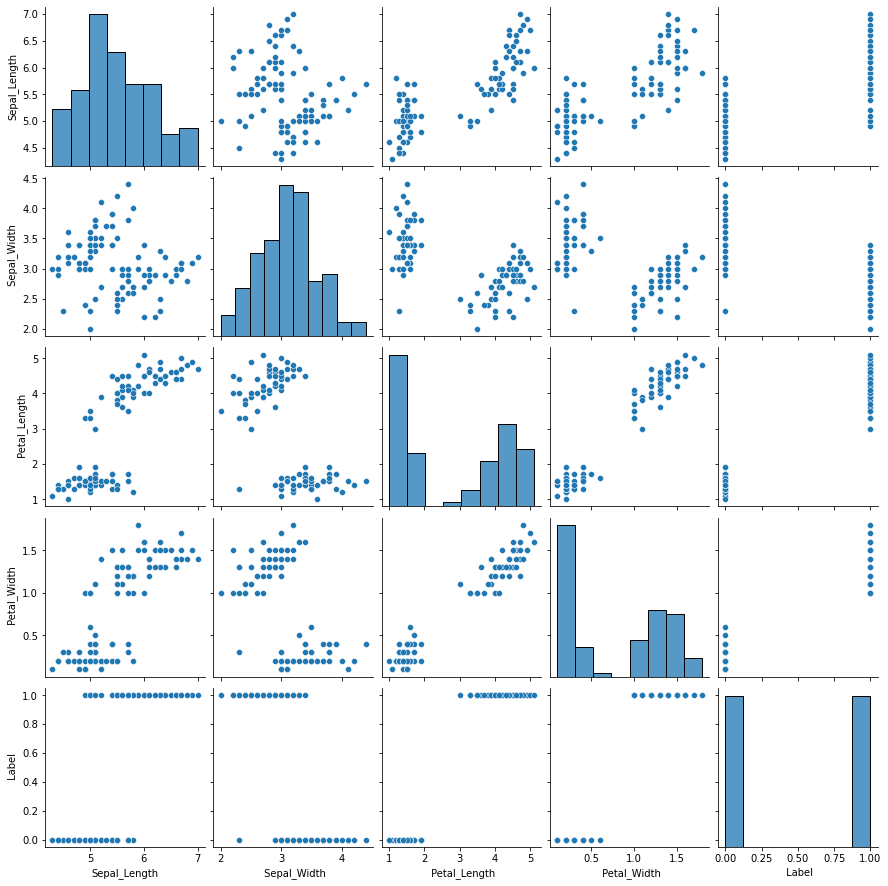

In [14]:
# visualize the relationship between the features
sns.pairplot(df)

In [15]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
X_size = X.shape[0]
inds = np.arange(X_size)
np.random.shuffle(inds)
X = X[inds]
y = y[inds]
X_train, X_val, X_test, y_train, y_val, y_test = X[:70, :], X[70:80, :], X[80:, :], \
                                                 y[:70], y[70:80], y[80:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)

In [16]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

- 1-sample

Theta:  [ 0.52569449 -0.7137141  -0.8986777   1.8636013   1.4830727 ]
Testing accuracy: 100.0%


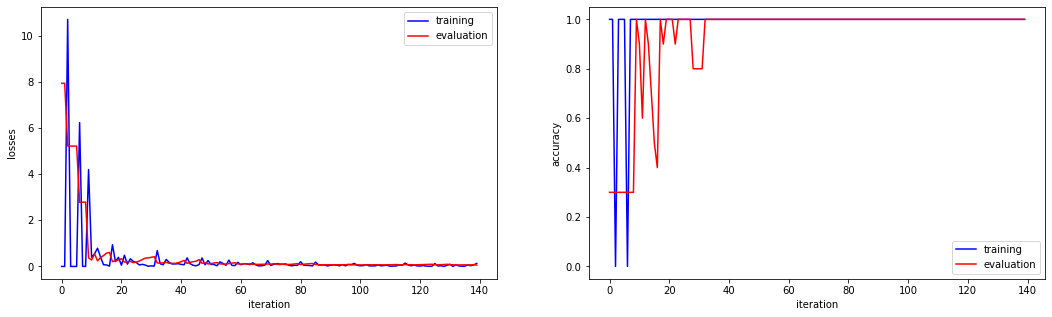

In [22]:
lr=0.1
num_iter = 2
theta = np.array([1., 1., 1., 1., 1.])
losses_train = []
accs_train   = []
losses_test = []
accs_test   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]
    
    # for each mini-batch
    for j in range(X_train_size):

        # pick 1 sample for training
        x_ = X_train[j:j+1, :]
        y_ = y_train[j:j+1]
        
        # predict z
        y_hat = predict(x_, theta)
        
        # compute loss
        loss = loss_function(y_hat, y_)
        
        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss for training
        losses_train.append(loss)
        
        theta -= lr*gradient

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs_train.append(acc)
        
        # evaluation
        y_hat = predict(X_val, theta)
        losses_test.append(loss_function(y_hat, y_val))
        preds = y_hat.round()
        acc = (preds == y_val).mean()
        accs_test.append(acc)
        
print('Theta: ', theta)
print('Testing accuracy: {}%'.format((predict(X_test, theta).round() == y_test).mean()*100))

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses_train, color='b', label='training')
axs[0].plot(losses_test, color='r', label='evaluation')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs_train, color='b', label='training')
axs[1].plot(accs_test, color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='accuracy')
axs[0].legend()
axs[1].legend()

- m-sample

Theta:  [ 0.65038419 -0.55933546 -0.31361808  1.00157337  1.10740162]
Testing accuracy: 100.0%


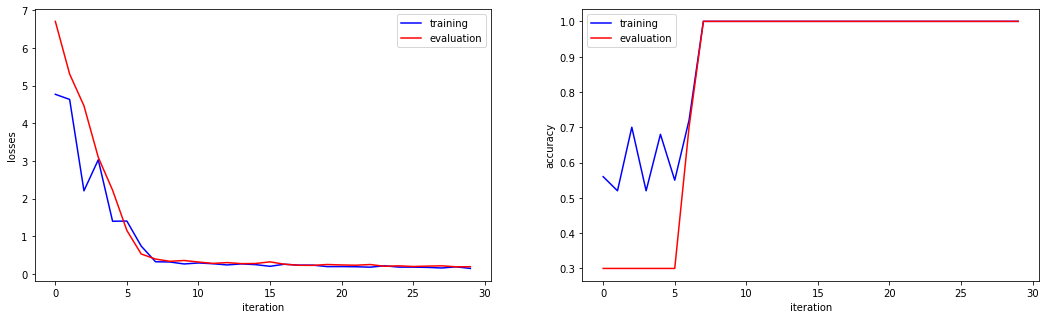

In [23]:
lr=0.1
num_iter = 10
m = 25
theta = np.array([1., 1., 1., 1., 1.])
losses_train = []
accs_train   = []
losses_test = []
accs_test   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]
    
    # for each mini-batch
    for j in range(0, X_train_size, m):
        
        if j+m >= X_train_size:
            k = X_train_size
        else:
            k = j+m
            
        # pick m samples for training
        x_ = X_train[j:k, :]
        y_ = y_train[j:k]
        
        # predict z
        y_hat = predict(x_, theta)
        
        # compute loss
        loss = loss_function(y_hat, y_)

        # compute mean of gradient
        gradient = compute_gradient(x_, y_hat, y_)
    
        # loss for training
        losses_train.append(loss)
        
        theta -= lr*gradient

        # accuracy for training
        preds = predict(x_, theta).round()
        acc = (preds == y_).mean()
        accs_train.append(acc)
        
        # evaluation
        y_hat = predict(X_val, theta)
        losses_test.append(loss_function(y_hat, y_val))
        preds = y_hat.round()
        acc = (preds == y_val).mean()
        accs_test.append(acc)
        
print('Theta: ', theta)
print('Testing accuracy: {}%'.format((predict(X_test, theta).round() == y_test).mean()*100))

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses_train, color='b', label='training')
axs[0].plot(losses_test, color='r', label='evaluation')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs_train, color='b', label='training')
axs[1].plot(accs_test, color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='accuracy')
axs[0].legend()
axs[1].legend()

- N-sample

Theta:  [ 0.62144396 -0.6003617  -0.47090163  1.23474234  1.20535723]
Testing accuracy: 100.0%


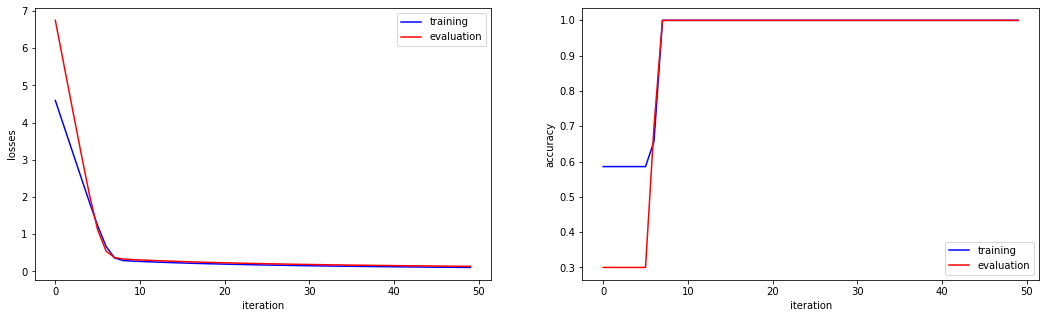

In [25]:
lr=0.1
num_iter = 50
theta = np.array([1., 1., 1., 1., 1.])
losses_train = []
accs_train   = []
losses_test = []
accs_test   = []

for i in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[inds]
  
    # predict z
    y_hat = predict(X_train, theta)
        
    # compute loss
    loss = loss_function(y_hat, y_train)
        
    # compute mean of gradient
    gradient = compute_gradient(X_train, y_hat, y_train)
    
    # loss for training
    losses_train.append(loss)
        
    theta -= lr*gradient

    # accuracy for training
    preds = predict(X_train, theta).round()
    acc = (preds == y_train).mean()
    accs_train.append(acc)
        
    # evaluation
    y_hat = predict(X_val, theta)
    losses_test.append(loss_function(y_hat, y_val))
    preds = y_hat.round()
    acc = (preds == y_val).mean()
    accs_test.append(acc)
        
print('Theta: ', theta)
print('Testing accuracy: {}%'.format((predict(X_test, theta).round() == y_test).mean()*100))

# show figures
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(losses_train, color='b', label='training')
axs[0].plot(losses_test, color='r', label='evaluation')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[1].plot(accs_train, color='b', label='training')
axs[1].plot(accs_test, color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='accuracy')
axs[0].legend()
axs[1].legend()